In [1]:
import pandas as pd
from datetime import timedelta, datetime
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

import acquire
import prepare

## Store data

In [2]:
# Get the data from acquire.py

df = acquire.get_store_data()
df.head(3)

,sale_amount,sale_date,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
0,13.0,"Tue, 01 Jan 2013 00:00:00 GMT",1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
1,11.0,"Wed, 02 Jan 2013 00:00:00 GMT",2,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2,14.0,"Thu, 03 Jan 2013 00:00:00 GMT",3,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013


### 1. Convert date column to datetime format.

In [3]:
# Convert to datetime 

df.sale_date = pd.to_datetime(df.sale_date, format='%a, %d %b %Y %H:%M:%S %Z')

### 2. Plot the distribution of sale_amount and item_price.

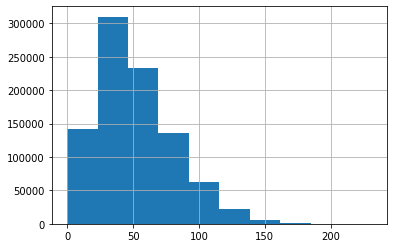

In [4]:
# Histogram of sale_amount

df.sale_amount.hist()

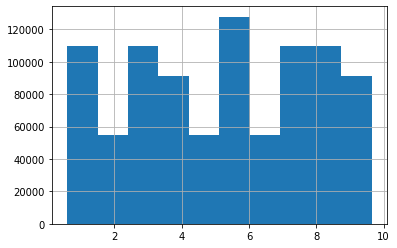

In [5]:
# Histogram of item_price

df.item_price.hist()

### 3. Convert sale_date to index for time series analysis

In [6]:
# Make sales_date the index

df = df.set_index('sale_date').sort_index()
df.head(2)

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14
sale_date,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013
2013-01-01 00:00:00+00:00,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211


### 4. Add a 'month' and 'day of week' column to your dataframe.

In [7]:
# Add 2 new columns to df: month and day_of_week

df['month'] = df.index.month
df['day_of_week'] = df.index.day_name()
df.head(2)

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,day_of_week
sale_date,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Tuesday
2013-01-01 00:00:00+00:00,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday


### 5. Add a column to your dataframe, sales_total, which is a derived from sale_amount (total items) and item_price.

In [8]:
# Add column for sales_total to df

df['sales_total'] = df.sale_amount * df.item_price
df.head(2)

,sale_amount,sale_id,store_address,store_city,store_id,store_state,store_zipcode,item_brand,item_id,item_name,item_price,item_upc12,item_upc14,month,day_of_week,sales_total
sale_date,,,,,,,,,,,,,,,,
2013-01-01 00:00:00+00:00,13.0,1,12125 Alamo Ranch Pkwy,San Antonio,1,TX,78253,Riceland,1,Riceland American Jazmine Rice,0.84,35200264013,35200264013,1,Tuesday,10.92
2013-01-01 00:00:00+00:00,26.0,211817,12018 Perrin Beitel Rd,San Antonio,7,TX,78217,Mueller,12,Mueller Sport Care Basic Support Level Medium ...,8.40,74676640211,74676640211,1,Tuesday,218.40


### 6. Make it reproducable

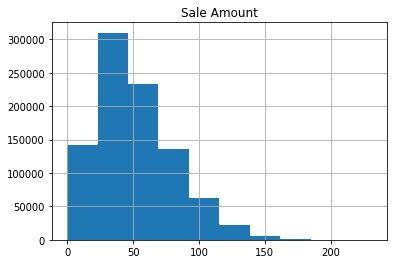

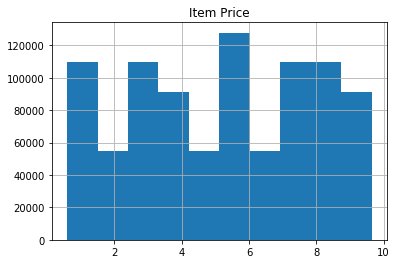

                           sale_amount  sale_id           store_address  \
sale_date                                                                 
2013-01-01 00:00:00+00:00         13.0        1  12125 Alamo Ranch Pkwy   
2013-01-01 00:00:00+00:00         26.0   211817  12018 Perrin Beitel Rd   
2013-01-01 00:00:00+00:00         27.0   832657  12018 Perrin Beitel Rd   
2013-01-01 00:00:00+00:00         54.0   213643     15000 San Pedro Ave   
2013-01-01 00:00:00+00:00         35.0   215469      735 SW Military Dr   

                            store_city  store_id store_state  store_zipcode  \
sale_date                                                                     
2013-01-01 00:00:00+00:00  San Antonio         1          TX          78253   
2013-01-01 00:00:00+00:00  San Antonio         7          TX          78217   
2013-01-01 00:00:00+00:00  San Antonio         7          TX          78217   
2013-01-01 00:00:00+00:00  San Antonio         8          TX          78232   


In [9]:
store = acquire.get_store_data()
store_df = prepare.prep_store_data(store)

## Germany data

In [10]:
# Acquire the data

opsd_df = acquire.opsd_germany_daily()
opsd_df

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.18400,NaN,NaN,NaN
1,2006-01-02,1380.52100,NaN,NaN,NaN
2,2006-01-03,1442.53300,NaN,NaN,NaN
3,2006-01-04,1457.21700,NaN,NaN,NaN
4,2006-01-05,1477.13100,NaN,NaN,NaN
...,...,...,...,...,...
4378,2017-12-27,1263.94091,394.507,16.530,411.037
4379,2017-12-28,1299.86398,506.424,14.162,520.586
4380,2017-12-29,1295.08753,584.277,29.854,614.131
4381,2017-12-30,1215.44897,721.247,7.467,728.714


### 1. Convert date column to datetime format.

In [11]:
# Convert to datetime 

opsd_df.Date = pd.to_datetime(opsd_df.Date)

### 2. Plot the distribution of each of your variables.

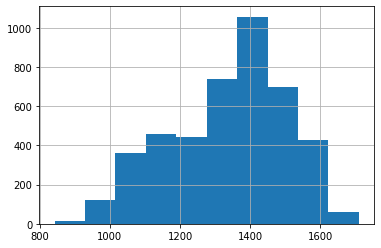

In [12]:
# Histogram of consumption

opsd_df.Consumption.hist()

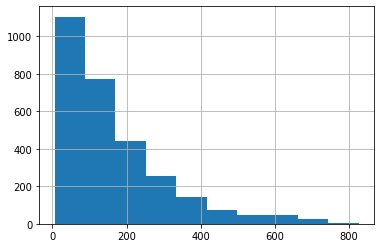

In [13]:
# Histogram of wind

opsd_df.Wind.hist()

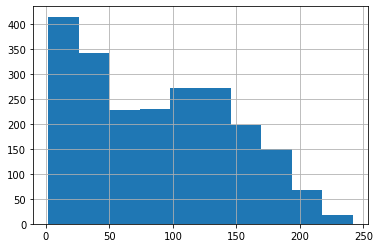

In [14]:
# Histogram of solar

opsd_df.Solar.hist()

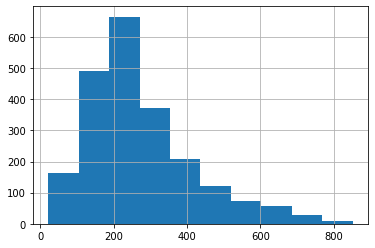

In [15]:
# Histogram of wind and solar

opsd_df['Wind+Solar'].hist()

### 3. Set the index to be the datetime variable.

In [16]:
# Set date to be the index

opsd_df = opsd_df.set_index('Date').sort_index()
opsd_df.head()

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN
2006-01-04,1457.217,NaN,NaN,NaN
2006-01-05,1477.131,NaN,NaN,NaN


### 4. Add a month and a year column to your dataframe.

In [17]:
# Create two new columns: month and year

opsd_df['Month'] = opsd_df.index.month
opsd_df['Year'] = opsd_df.index.year
opsd_df.head()

,Consumption,Wind,Solar,Wind+Solar,Month,Year
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,1,2006
2006-01-02,1380.521,NaN,NaN,NaN,1,2006
2006-01-03,1442.533,NaN,NaN,NaN,1,2006
2006-01-04,1457.217,NaN,NaN,NaN,1,2006
2006-01-05,1477.131,NaN,NaN,NaN,1,2006


### 5. Fill any missing values.

In [18]:
# Use fillna to address nulls/NaNs

opsd_df = opsd_df.fillna(0)
opsd_df.isna().sum()

Consumption    0
Wind           0
Solar          0
Wind+Solar     0
Month          0
Year           0
dtype: int64

### 6. Make sure all the work that you have done is reproducible. 

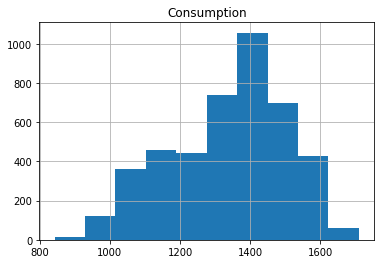

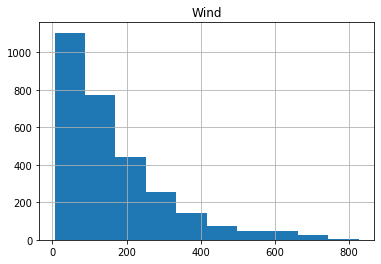

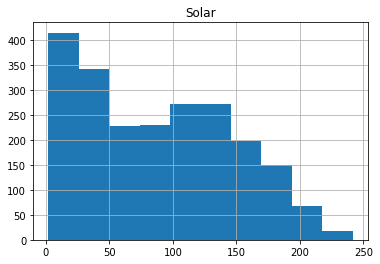

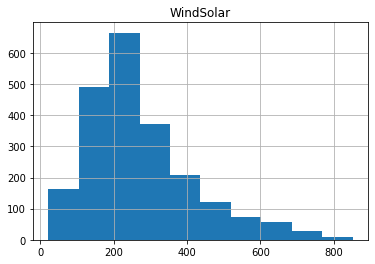

            Consumption  Wind  Solar  WindSolar  month  year
Date                                                        
2006-01-01     1069.184   0.0    0.0        0.0      1  2006
2006-01-02     1380.521   0.0    0.0        0.0      1  2006
2006-01-03     1442.533   0.0    0.0        0.0      1  2006
2006-01-04     1457.217   0.0    0.0        0.0      1  2006
2006-01-05     1477.131   0.0    0.0        0.0      1  2006


In [19]:
opsd2_df = acquire.opsd_germany_daily()
opsd3_df = prepare.prep_germany_data(opsd2_df)